# 01 - Criando Séries Temporais
Esse notebook mostra algumas formas de criar e séries temporais através de dados transacionais. Iremos usar uma tabela com os lançamentos da Netflix. Mais informações sobre a tabela [aqui]((https://www.kaggle.com/datasets/anandshaw2001/netflix-movies-and-tv-shows/code).)

In [1]:
import pandas as pd
df = pd.read_csv('/Users/danielferreira/Documents/git/ik_classes/ASN/Time Series/data/netflix_titles.csv')

<Axes: xlabel='date_added'>

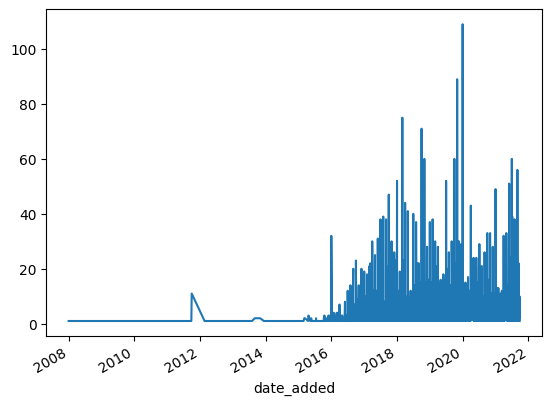

In [2]:
df['date_added']=pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')
series = df.groupby('date_added')['show_id'].count()
series.plot()